# **Proyecto 2** | Modelos de Regresión Lineal

## Link del Repositorio

* https://github.com/paulabaal12/PROY2-DM

## Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

### **Importar las librerías a utilizar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### **Leer archivo de datos**

In [2]:
data = pd.read_csv('datos/train.csv')

### **Obtener las primeros 10 datos**

In [3]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Al tener una primera impresión del dataset, podemos observar que existen valores nulos en algunas de las columnas. Nos interesa saber la cantidad de observaciones no-nulas en cada una de nuestras variables.

#### **Verificar el tipo de variables de la data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### **Se obtiene la descripción de las variables**

A continuación se observará que tan dispersos estan los datos para cada columna, para estar seguros si se deben o no escalar las variables.

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Ahora se listarán las variables categóricas para saber que tipo de codificación se necesitará.

In [6]:
# Obtener lista de columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print(f"Total de variables categóricas: {len(categorical_columns)}")
print(categorical_columns)


Total de variables categóricas: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
# Resumen de variables categóricas
cat_summary = pd.DataFrame({
    'Columna': categorical_columns,
    'Número de Categorías': [data[col].nunique() for col in categorical_columns],
    'Categorías': [', '.join(map(str, data[col].unique())) for col in categorical_columns]
})

cat_summary


,Columna,Número de Categorías,Categorías
0,MSZoning,5,"RL, RM, C (all), FV, RH"
1,Street,2,"Pave, Grvl"
2,Alley,2,"nan, Grvl, Pave"
3,LotShape,4,"Reg, IR1, IR2, IR3"
4,LandContour,4,"Lvl, Bnk, Low, HLS"
5,Utilities,2,"AllPub, NoSeWa"
6,LotConfig,5,"Inside, FR2, Corner, CulDSac, FR3"
7,LandSlope,3,"Gtl, Mod, Sev"
8,Neighborhood,25,"CollgCr, Veenker, Crawfor, NoRidge, Mitchel, S..."
9,Condition1,9,"Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, P..."


#### **Análisis de observaciones**
- A simple vista, podemos observar que los rangos de las magnitudes de las columnas están algo dispersos, por lo que podría considerarse realizar un escalado de las variables.
- Respecto a las variables categóricas, tenemos distintos tipos de categorías:
    - Categorías por orden: En su mayoría describen la calidad de cierto aspecto de la vivienda.
    - Categorías nominales: Describen categorías sin orden.
    - Categorías de alta cardinalidad: Hay variables con 9 categorías o más

**Codificar variables categóricas**


In [8]:
# Codificación Ordinal con órdenes específicos
ordinal_orders = {
    "ExterQual": ['Fa', 'TA', 'Gd', 'Ex'],
    "ExterCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtQual": ['Missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtCond": ['Missing', 'Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure": ['Missing', 'No', 'Mn', 'Av'],
    "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['Fa', 'TA', 'Gd', 'Ex'],
    "Functional": ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    "FireplaceQu": ['Missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['Missing', 'Unf', 'RFn', 'Fin'],
    "GarageQual": ['Missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageCond": ['Missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "PoolQC": ['Missing', 'Fa', 'Gd', 'Ex'],
    "Fence": ['Missing', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

for col, order in ordinal_orders.items():
    # Se manejan los NaNs como categoría 'Missing' indicando que la vivienda no cuenta con esa característica.
    data[col] = data[col].fillna('Missing')

    ordinal_mapping = {k: v for v, k in enumerate(order, start=0)}
    data[col] = data[col].map(ordinal_mapping)
    data[col] = data[col].fillna(-1).astype(int)

# Reemplazar Nans en algunas variables categóricas
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

# One-Hot Encoding para variables nominales
one_hot_cols = [
    "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities",
    "LotConfig", "LandSlope", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Foundation", "Heating", "CentralAir", "PavedDrive", "SaleType", "SaleCondition",
    "MasVnrType", "BsmtFinType1", "BsmtFinType2", "Electrical", "GarageType"
]

data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

# Frequency Encoding para variables con alta cardinalidad
freq_cols = ["Neighborhood", "Condition1", "Condition2", "Exterior1st", "Exterior2nd", "MiscFeature"]

for col in freq_cols:
    freq_map = data[col].value_counts(normalize=True).to_dict()
    data[col] = data[col].map(freq_map)

# Verificación final
print("\nVerificación de codificación ordinal:")
print(data[["MiscFeature"]].head())


Verificación de codificación ordinal:
   MiscFeature
0     0.963014
1     0.963014
2     0.963014
3     0.963014
4     0.963014


#### **Verificación de Variables**

In [9]:
print("\nTipos de datos después del preprocesamiento:")
print(data.dtypes.value_counts())


Tipos de datos después del preprocesamiento:
bool       90
int64      49
float64     9
Name: count, dtype: int64


Ya no quedan variables categóricas

### **Verificar que tipos de columnas tienen muchos nulls**

In [10]:
null_values = data.isnull().sum()
null_percent = (null_values / len(data)) * 100
null_data = pd.DataFrame({'Valores Faltantes': null_values, 'Porcentaje': null_percent, 'Tipo de Dato': data.dtypes})
null_data = null_data[null_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print("\nValores nulos por columna:")
null_data



Valores nulos por columna:


,Valores Faltantes,Porcentaje,Tipo de Dato
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
MasVnrArea,8,0.547945,float64


**Analizar que se debe de hacer con los datos null**

- LotFrontage: Esta es la longitud de la calle conectada a la propiedad, con esto se pueden rellenar los valores con algún método como Min Max o utilizar la Mediana
- GarageYrBlt: Es el año en que se construyó el garage, el valor Na puede significar o que no tiene garage o que no hay información del garage, por lo que es mejor incluir NA como categoría si la vivienda no tiene garage, y para los que si tienen garage, pero no tienen información se podría rellenar con algún método como Min Max o la Mediana.
- MasVnrArea: Esta significa el área de mampostería en pies cuadrados, es un caso similar al del garage ya que podría ser por datos faltantes o por que la vivienda no tiene mampostería por lo que se puede aplicar un balanceo parecido al de GarageYrBlt

In [11]:
null_values = data.isnull().sum()
null_percent = (null_values / len(data)) * 100
null_data = pd.DataFrame({'Valores Faltantes': null_values, 'Porcentaje': null_percent, 'Tipo de Dato': data.dtypes})
null_data = null_data[null_data['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print("\nValores nulos por columna:")
null_data



Valores nulos por columna:


,Valores Faltantes,Porcentaje,Tipo de Dato
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
MasVnrArea,8,0.547945,float64


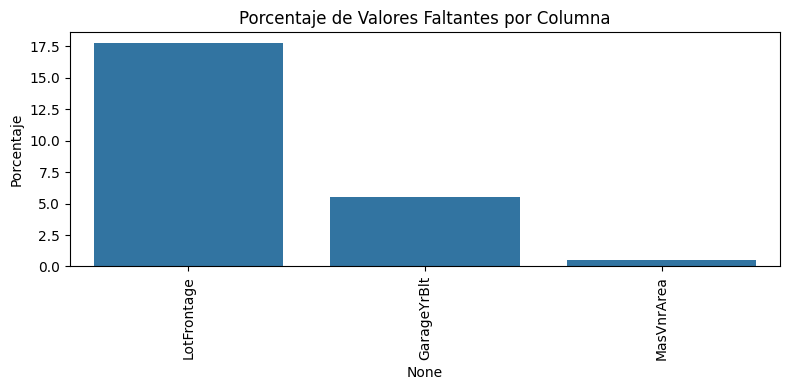

In [12]:
plt.figure(figsize=(8, 4))
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xticks(rotation=90)
sns.barplot(x=null_data.index, y=null_data['Porcentaje'])
plt.tight_layout()
plt.show()

In [13]:
# Filtrar las columnas que tienen más del 50% de valores nulos
columnsmany_nulls = null_percent[null_percent > 50]

# Convertir a DataFrame para mejor visualización
columnsmany_nulls_df = columnsmany_nulls.to_frame(name='Porcentaje de Valores Nulos')
columnsmany_nulls_df

,Porcentaje de Valores Nulos


### **Manejo de valores faltantes para el resto de variables**

In [14]:
# Columnas numéricas con valores nulos
numerical_with_nulls = ['LotFrontage','GarageYrBlt','MasVnrArea']

# Llenar los valores faltantes con la media 
for col in numerical_with_nulls:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

data[numerical_with_nulls].isnull().sum()



LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

In [15]:
data.head(10)

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,...,BsmtFinType2_Unf,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,65.0,8450,0.102740,0.863014,0.989726,7,5,2003,...,True,False,False,False,True,True,False,False,False,False
1,2,20,80.0,9600,0.007534,0.055479,0.989726,6,8,1976,...,True,False,False,False,True,True,False,False,False,False
2,3,60,68.0,11250,0.102740,0.863014,0.989726,7,5,2001,...,True,False,False,False,True,True,False,False,False,False
3,4,70,60.0,9550,0.034932,0.863014,0.989726,7,5,1915,...,True,False,False,False,True,False,False,False,False,True
4,5,60,84.0,14260,0.028082,0.863014,0.989726,8,5,2000,...,True,False,False,False,True,True,False,False,False,False
5,6,50,85.0,14115,0.033562,0.863014,0.989726,5,5,1993,...,True,False,False,False,True,True,False,False,False,False
6,7,20,75.0,10084,0.058904,0.863014,0.989726,8,5,2004,...,True,False,False,False,True,True,False,False,False,False
7,8,60,69.0,10382,0.050000,0.013014,0.989726,7,6,1973,...,False,False,False,False,True,True,False,False,False,False
8,9,50,51.0,6120,0.077397,0.032877,0.989726,7,5,1931,...,True,True,False,False,False,False,False,False,False,True
9,10,190,50.0,7420,0.039726,0.032877,0.001370,5,6,1939,...,True,False,False,False,True,True,False,False,False,False


### **Verificación de datos duplicados**

In [16]:
# Verificar duplicados
duplicated_data = data.duplicated()
print(f"Hay {duplicated_data.sum()} filas duplicadas en el DataFrame.")

Hay 0 filas duplicadas en el DataFrame.


### **Análisis de grupos**

In [17]:
# características numéricas para el clustering
numeric_features = data.select_dtypes(include=[np.number])

# Manejar los valores faltantes llenándolos con la media de cada columna
numeric_features = numeric_features.fillna(numeric_features.median())

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Aplicar K-Means para identificar los grupos
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analizar las características de cada grupo
cluster_analysis = numeric_features.copy()
cluster_analysis['Cluster'] = data['Cluster']
cluster_analysis = cluster_analysis.groupby('Cluster').mean()
print(cluster_analysis)

                 Id  MSSubClass  LotFrontage       LotArea  Neighborhood  \
Cluster                                                                    
0        742.668449   51.951872    67.744652   9714.709893      0.078258   
1        737.398533   66.699267    66.591687   8930.926650      0.062215   
2        696.162791   72.383721    61.360465   7567.988372      0.058052   
3        689.161290   49.331797    86.705069  17439.493088      0.049795   

         Condition1  Condition2  OverallQual  OverallCond    YearBuilt  ...  \
Cluster                                                                 ...   
0          0.717369    0.976530     5.332888     5.911765  1952.898396  ...   
1          0.807531    0.989726     6.860636     5.102689  2000.359413  ...   
2          0.702071    0.978265     4.639535     5.511628  1940.406977  ...   
3          0.769936    0.971501     7.884793     5.331797  1991.986175  ...   

         3SsnPorch  ScreenPorch   PoolArea    PoolQC     Fence  Misc

### **Entrenamiendo de Datos**

In [18]:
# División del conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Número de filas en cada conjunto
print(f"Número de filas en el conjunto de entrenamiento: {len(train_data)}")
print(f"Número de filas en el conjunto de prueba: {len(test_data)}")

Número de filas en el conjunto de entrenamiento: 1168
Número de filas en el conjunto de prueba: 292


In [19]:
X = train_data[numeric_features.columns]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")

#train_indices = X_train.index
#test_indices = X_test.index
#np.save('train_indices.npy', train_indices)
#np.save('test_indices.npy', test_indices)


Datos de entrenamiento: (934, 58), Datos de prueba: (234, 58)


### **Ingeniería de Características**

Top 10 características correlacionadas con SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
ExterQual      0.682639
Cluster        0.669768
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.585207
Name: SalePrice, dtype: float64


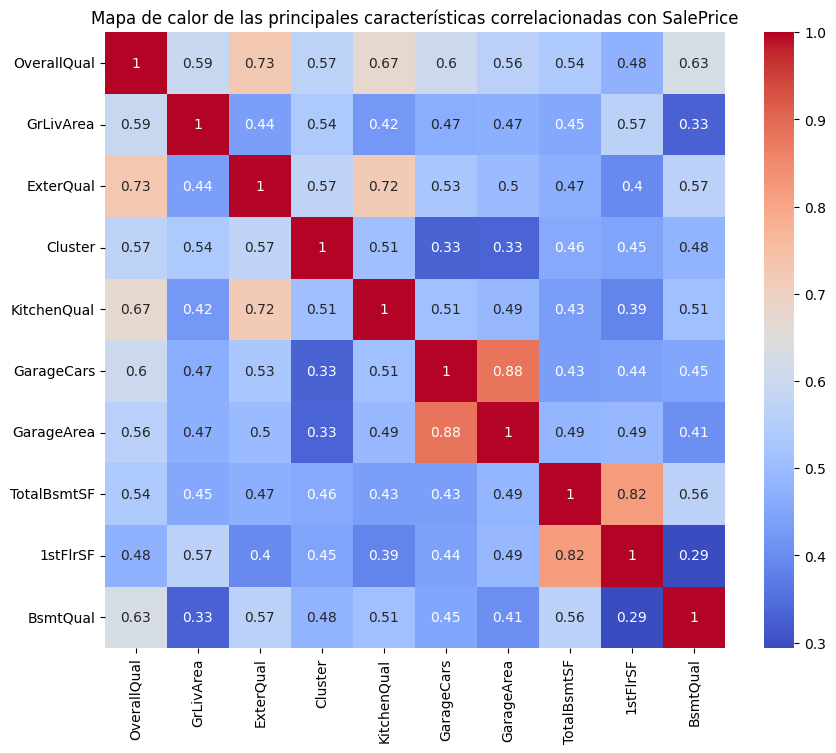

In [20]:
# Columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la correlación de todas las variables con SalePrice
correlation_matrix = numeric_data.corr()
price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Variables con mayor correlación con SalePrice
top_corr_features = price_correlations.index[1:11]  # Se excluye SalePrice
print("Top 10 características correlacionadas con SalePrice:")
print(price_correlations.head(11))

# Visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las principales características correlacionadas con SalePrice')
plt.show()

In [21]:

lr = LinearRegression()
selector = RFE(lr, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
rfe_support = selector.get_support()
rfe_features = X_train.columns[rfe_support]
print("\nTop 10 características seleccionadas por RFE:")
print(rfe_features.tolist())


Top 10 características seleccionadas por RFE:
['Condition1', 'Condition2', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'FullBath', 'KitchenQual', 'GarageQual', 'GarageCond', 'SalePrice']


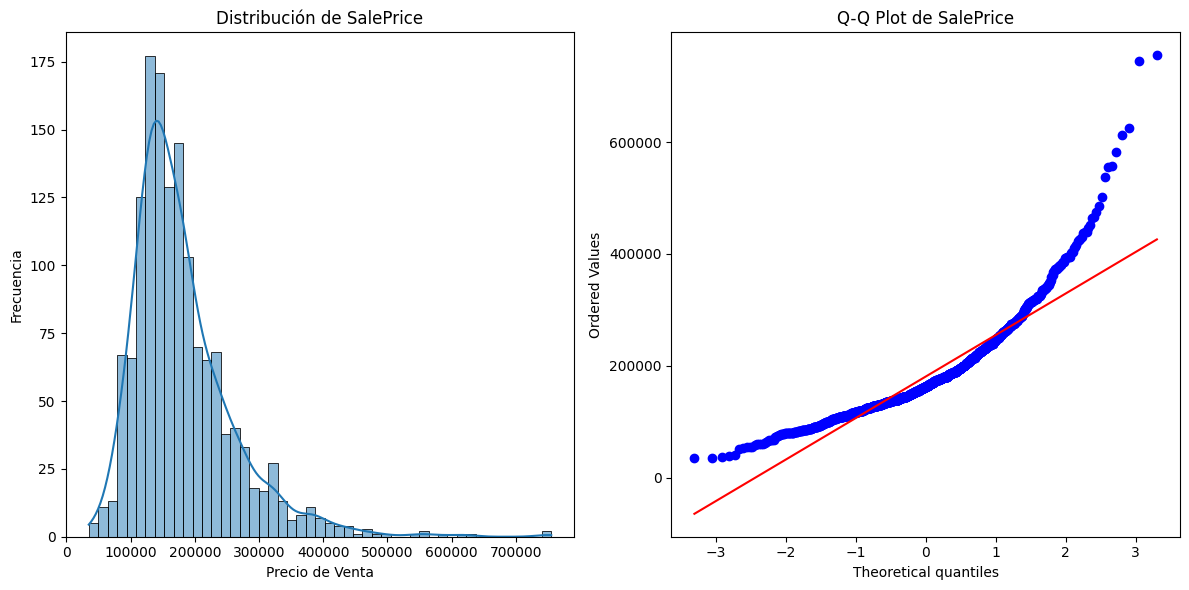

In [22]:
# Histograma de SalePrice

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
stats.probplot(data['SalePrice'], plot=plt)
plt.title('Q-Q Plot de SalePrice')

plt.tight_layout()
plt.show()